In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('data/used_car_canada_clean.csv')
df.head()

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,state
0,179999.0,9966.0,2017.0,acura,NSX,Base,coupe,Car,4WD,Automatic,hyrid,3.5,V,NB
1,179995.0,5988.0,2017.0,acura,NSX,Base,coupe,Car,4WD,Automatic,hyrid,3.5,V,QC
2,168528.0,24242.0,2017.0,acura,NSX,Base,coupe,Car,4WD,Automatic,hyrid,3.5,V,BC
3,220000.0,6637.0,2020.0,acura,NSX,Base,coupe,Car,4WD,Automatic,hyrid,3.5,V,ON
4,220000.0,6637.0,2020.0,acura,NSX,Base,coupe,Car,4WD,Automatic,hyrid,3.5,V,ON


In [3]:
cols_to_drop = ['vehicle_type','drivetrain', 'transmission', 'fuel_type', 'engine_block']
df = df.drop(cols_to_drop, axis=1)

In [5]:
df.head()

,price,miles,year,make,model,trim,body_type,engine_size,state
0,179999.0,9966.0,2017.0,acura,NSX,Base,coupe,3.5,NB
1,179995.0,5988.0,2017.0,acura,NSX,Base,coupe,3.5,QC
2,168528.0,24242.0,2017.0,acura,NSX,Base,coupe,3.5,BC
3,220000.0,6637.0,2020.0,acura,NSX,Base,coupe,3.5,ON
4,220000.0,6637.0,2020.0,acura,NSX,Base,coupe,3.5,ON


In [6]:
df_toyota_honda = df.loc[(df['make'] == 'honda') | (df['make'] == 'toyota')]

In [7]:
df_toyota_honda.to_csv('data/honda_toyota_ca.csv', index=False, header=True)

## Model 

In [8]:
df = pd.read_csv('data/honda_toyota_ca.csv')
df.head()

,price,miles,year,make,model,trim,body_type,engine_size,state
0,4980.0,86132.0,2001.0,toyota,Prius,Base,sedan,1.5,BC
1,18926.0,80516.0,2017.0,toyota,Prius,Three Touring,hatchback,1.8,ON
2,23900.0,29295.0,2018.0,toyota,Prius,Base,hatchback,1.8,ON
3,27980.0,57894.0,2018.0,toyota,Prius,Touring,hatchback,1.8,BC
4,22887.0,95106.0,2016.0,toyota,Prius,Base,hatchback,1.8,AB


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df[['make', 'model']], test_size=0.2, shuffle=True, random_state=42)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

cat_index = [2,3,4,5,7]

cat_features_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore')),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_features_transformer, cat_index)
    ]
)


model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", GradientBoostingRegressor(random_state=42))
    ]
)

In [11]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 4, 5, 7])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [12]:
model.score(X_test, y_test)

0.5956161916906038

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 범주형 피처 인덱스
cat_index =[2,3,4,5,7]

# 범주형 피처 변환기
cat_features_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore')),
    ]
)

# 전처리기
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_features_transformer, cat_index)
    ]
)

# 모델 파이프라인 생성
def create_pipeline(regressor):
    return Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", regressor)
        ]
    )

# Linear Regression 모델 파이프라인
linear_reg_pipeline = create_pipeline(LinearRegression())

# Random Forest Regressor 모델 파이프라인
random_forest_pipeline = create_pipeline(RandomForestRegressor(random_state=42))

# XGBoost Regressor 모델 파이프라인
xgboost_pipeline = create_pipeline(XGBRegressor(random_state=42))

# 각 파이프라인을 훈련 및 평가할 수 있습니다.
linear_reg_pipeline.fit(X_train, y_train)
linear_reg_pipeline.score(X_test, y_test)







0.6216826592404368

In [16]:
random_forest_pipeline.fit(X_train, y_train)
random_forest_pipeline.score(X_test, y_test)

0.6767306751705409

In [17]:
xgboost_pipeline .fit(X_train, y_train)
xgboost_pipeline .score(X_test, y_test)

0.6713782736342044

In [18]:
y_pred_linear = random_forest_pipeline.predict(X_test)

In [25]:
import sklearn
import sys

print(f"scikit-learn version: {sklearn.__version__}")
print(f"Python version: {sys.version}")


scikit-learn version: 1.2.1
Python version: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_pred_linear))
print(mean_squared_error(y_test, y_pred_linear))

3922.2675283153803
32284601.90224378


In [20]:
import joblib
# 모델 저장
#joblib.dump(linear_reg_pipeline, 'linear_reg_pipeline.pkl')
joblib.dump(random_forest_pipeline, 'model.joblib')
#joblib.dump(xgboost_pipeline, 'xgboost_pipeline.pkl')

# 모델 로드
#loaded_linear_reg_pipeline = joblib.load('linear_reg_pipeline.pkl')
#loaded_random_forest_pipeline = joblib.load('random_forest_pipeline.pkl')
#loaded_xgboost_pipeline = joblib.load('xgboost_pipeline.pkl')

# 로드한 모델로 예측 (가상의 X_test 데이터를 사용)
# y_pred = loaded_linear_reg_pipeline.predict(X_test)
# y_pred = loaded_random_forest_pipeline.predict(X_test)
# y_pred = loaded_xgboost_pipeline.predict(X_test)

['model.joblib']

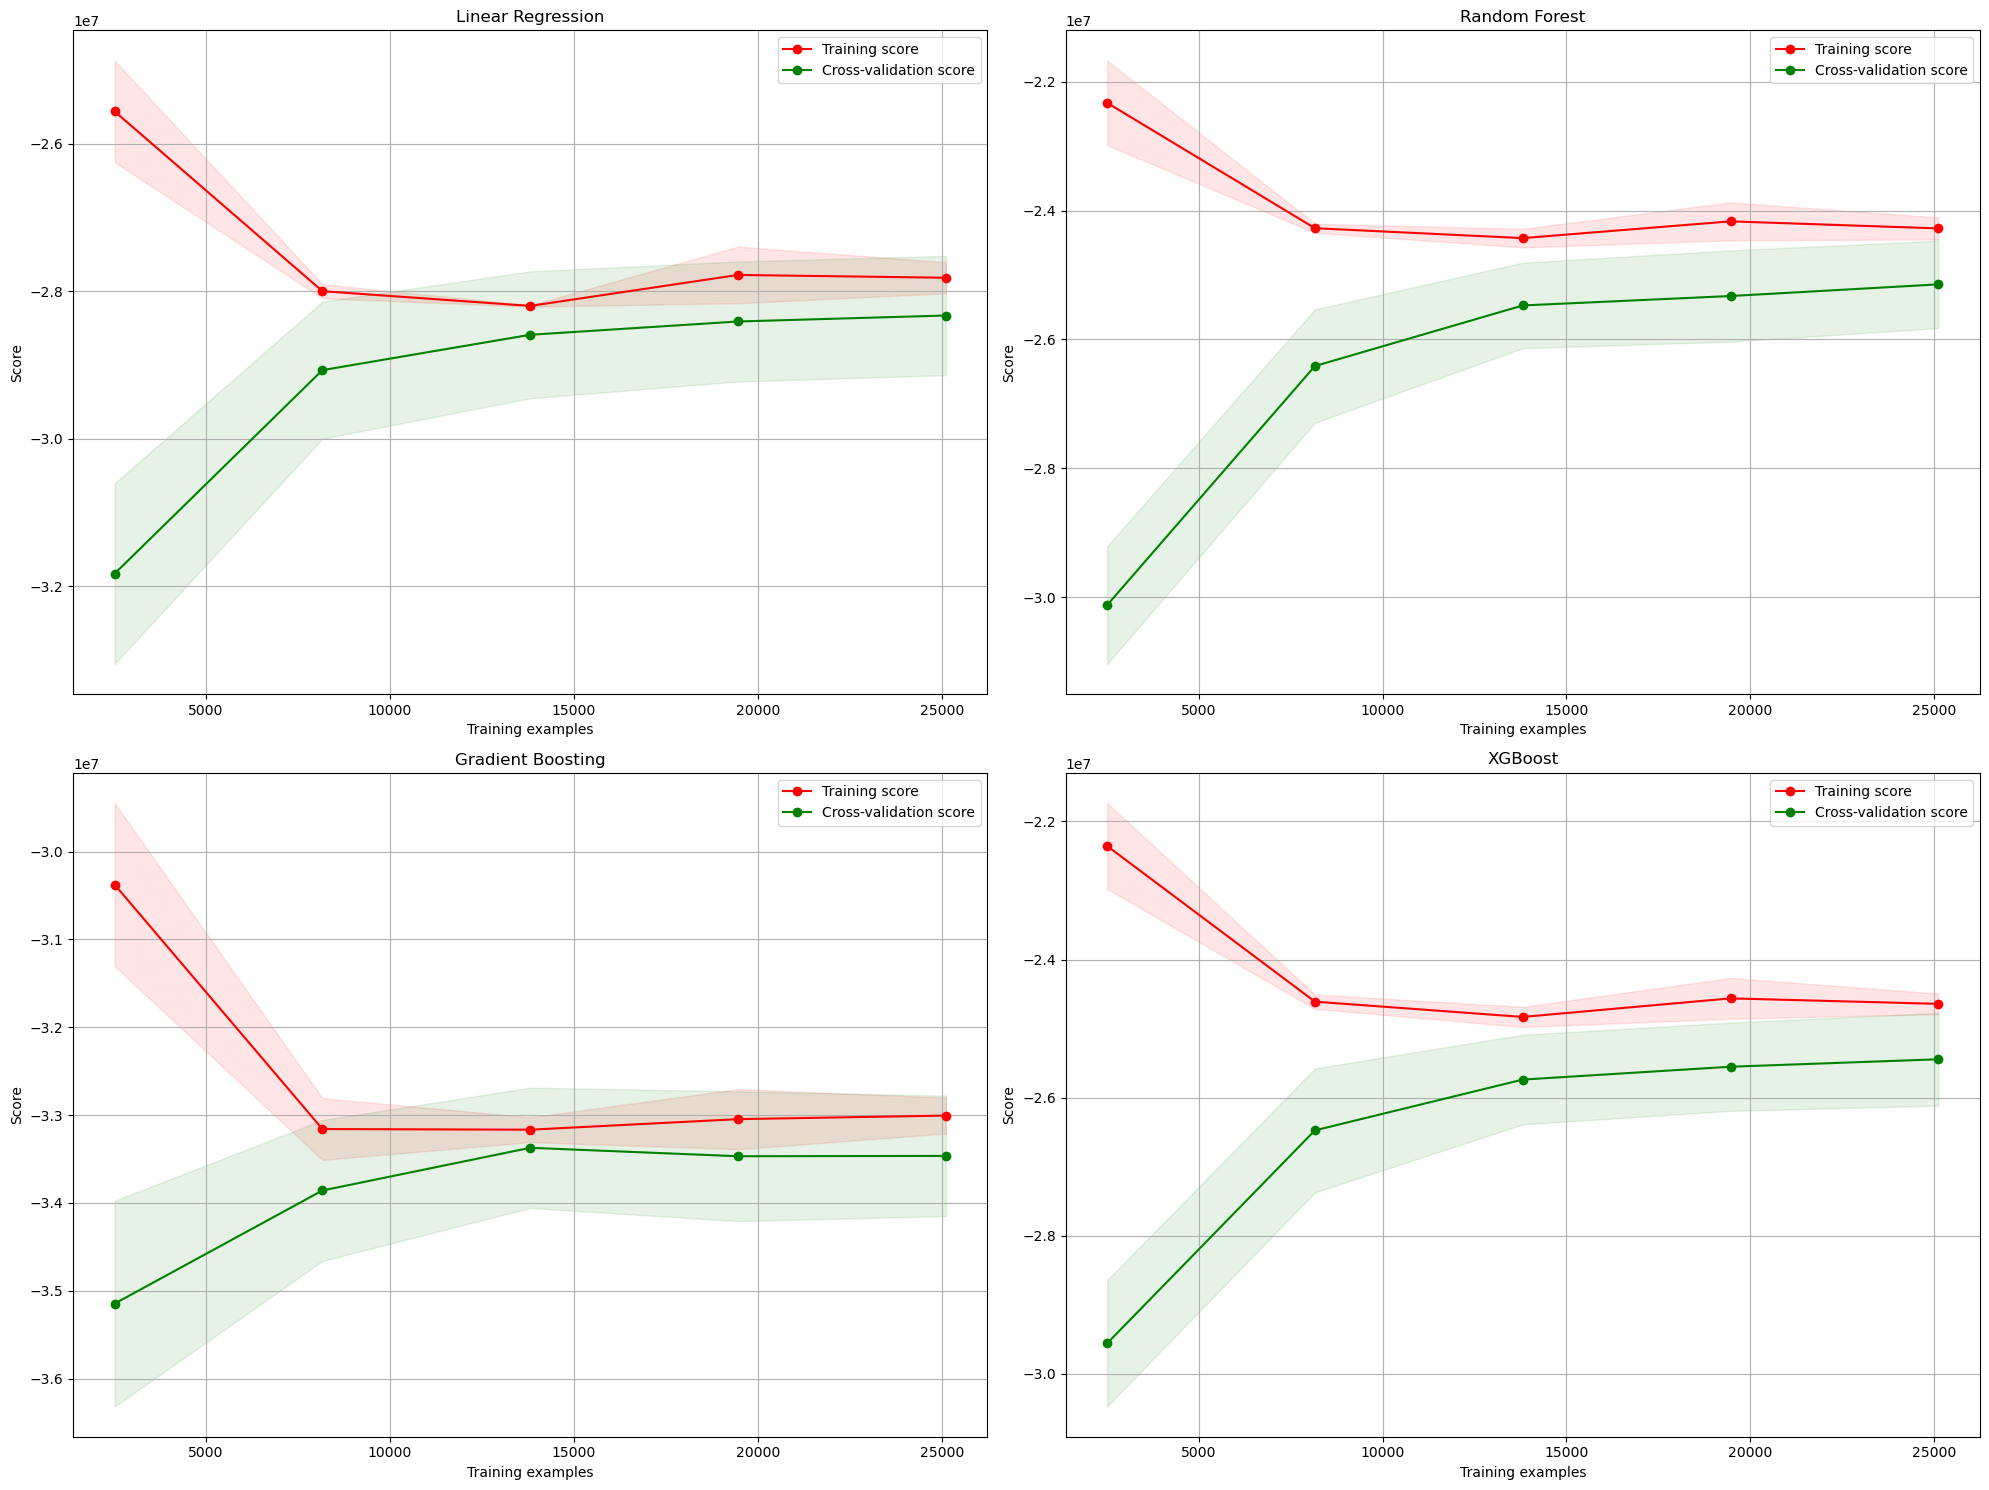

Linear Regression - MAE: 3795.4002204685635, MSE: 28790823.556143243
Random Forest - MAE: 3529.140009438248, MSE: 25527680.268902328
Gradient Boosting - MAE: 4203.344412565125, MSE: 34092393.81606699
XGBoost - MAE: 3553.6945848999644, MSE: 25780310.60399654


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ColumnTransformer 설정
cat_index = [2, 3, 4, 5, 6]

cat_features_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_features_transformer, cat_index)
    ]
)

# 모델 리스트
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# 학습 곡선을 시각화하는 함수
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 7))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.grid()

    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

    axes.legend(loc="best")
    return axes

# 각 모델에 대해 학습 곡선 시각화
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for ax, (name, model) in zip(axes.flatten(), models):
    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", model)
        ]
    )
    plot_learning_curve(pipeline, name, X_train, y_train, axes=ax, cv=5)

plt.tight_layout()
plt.show()

# 각 모델에 대해 MAE와 MSE 계산 및 출력
for name, model in models:
    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", model)
        ]
    )
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}")

#SCORE=MSE